# Suggested solution to Inaugral Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Figure](#toc2_)    
- 3. [Discrete solution](#toc3_)    
- 4. [Continous solution](#toc4_)    
- 5. [Estimate](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 12})

from HouseholdSpecializationModel_sol import HouseholdSpecializationModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = HouseholdSpecializationModelClass()

## 2. <a id='toc2_'></a>[Figure](#toc0_)

In [3]:
def plot(model):

    fig = plt.figure(figsize=(12,8))

    # HF/HM
    ax = fig.add_subplot(2,2,1)
    ax.set_title('female domestic work share')
    ax.plot(np.log(model.par.wF_vec),np.log(model.sol.HF_vec/model.sol.HM_vec),'-o',label='result')
    ax.plot(np.log(model.par.wF_vec),0.4-0.1*np.log(model.par.wF_vec),label='target')

    ax.set_xlabel('$log(w_F/w_M)$')
    ax.set_ylabel('$log(H_F/H_M)$')
    ax.legend(frameon=True)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('female+male domestic work')
    ax.plot(np.log(model.par.wF_vec),np.log(model.sol.HM_vec),'-o',label='$H_M$')
    ax.plot(np.log(model.par.wF_vec),np.log(model.sol.HF_vec),'-o',label='$H_F$')
    ax.set_xlabel('$log(w_F/w_M)$')
    ax.set_ylabel('$log(H_x)$')
    ax.legend(frameon=True)

    # H/L
    ax = fig.add_subplot(2,2,3)
    ax.set_title('domestic work vs. market work')
    ax.plot(np.log(model.par.wF_vec),(model.sol.HF_vec+model.sol.HM_vec)/(model.sol.LF_vec+model.sol.LM_vec),'-o')

    ax.set_xlabel('$log(w_F/w_M)$')
    ax.set_ylabel('$(H_F+H_M)/(L_F+L_M)$');

    # F/M
    ax = fig.add_subplot(2,2,4)
    ax.set_title('female work vs. male work')
    ax.plot(np.log(model.par.wF_vec),(model.sol.LF_vec+model.sol.HF_vec)/(model.sol.LM_vec+model.sol.HM_vec),'-o')

    ax.set_xlabel('$log(w_F/w_M)$')
    ax.set_ylabel('$(L_F+H_F)/(L_M+H_M)$')  

    fig.tight_layout(pad=1.0)
   

## 3. <a id='toc3_'></a>[Discrete solution](#toc0_)

In [4]:
opt = model.solve_discrete(do_print=True)

LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000


In [5]:
for alpha in [0.25,0.50,0.75]:
    for sigma in [0.5,1.0,1.5]:
        
        model_ = HouseholdSpecializationModelClass()
        model_.par.alpha = alpha
        model_.par.sigma = sigma
        
        opt = model_.solve_discrete()

        print(f'{alpha = :.2f}, {sigma = :.2f}: HF/HM = {opt.HF/opt.HM:.2f}')

alpha = 0.25, sigma = 0.50: HF/HM = 0.55
alpha = 0.25, sigma = 1.00: HF/HM = 0.31
alpha = 0.25, sigma = 1.50: HF/HM = 0.21
alpha = 0.50, sigma = 0.50: HF/HM = 1.00
alpha = 0.50, sigma = 1.00: HF/HM = 1.00
alpha = 0.50, sigma = 1.50: HF/HM = 1.00
alpha = 0.75, sigma = 0.50: HF/HM = 1.83
alpha = 0.75, sigma = 1.00: HF/HM = 3.25
alpha = 0.75, sigma = 1.50: HF/HM = 4.67


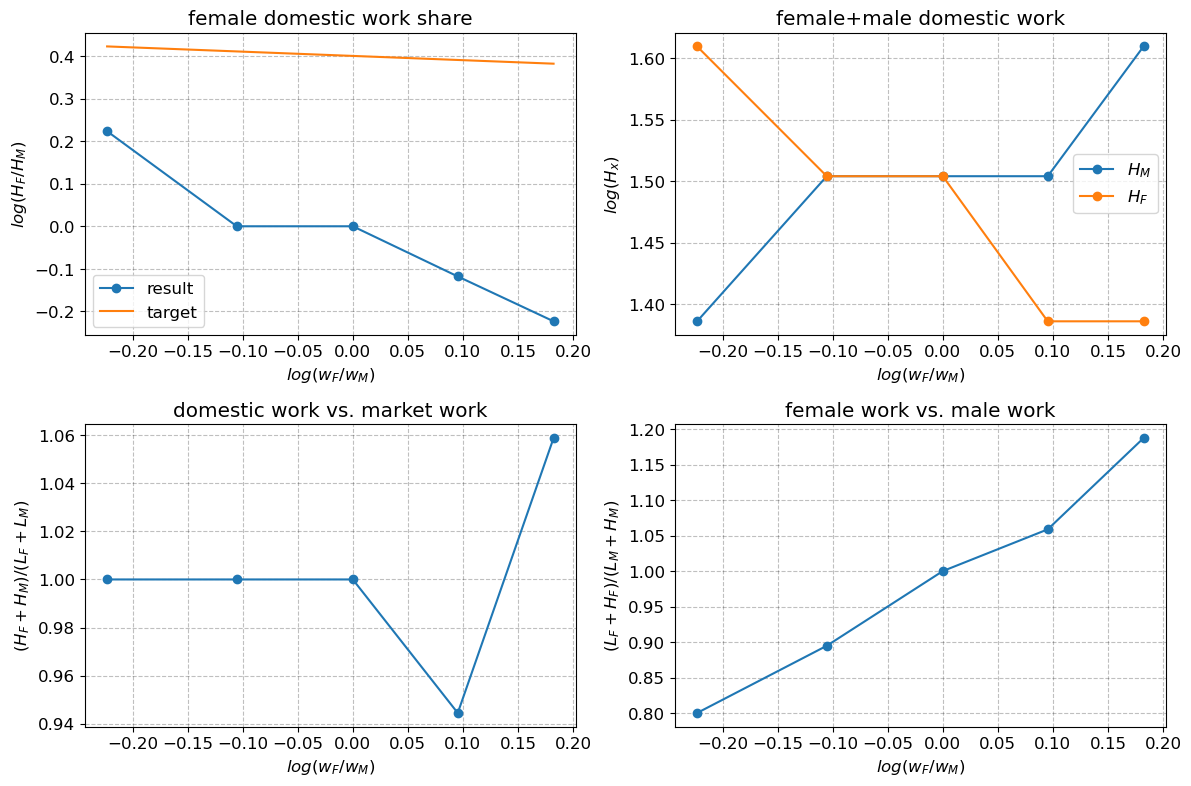

In [6]:
model.solve_wF_vec(discrete=True)
plot(model)

## 4. <a id='toc4_'></a>[Continous solution](#toc0_)

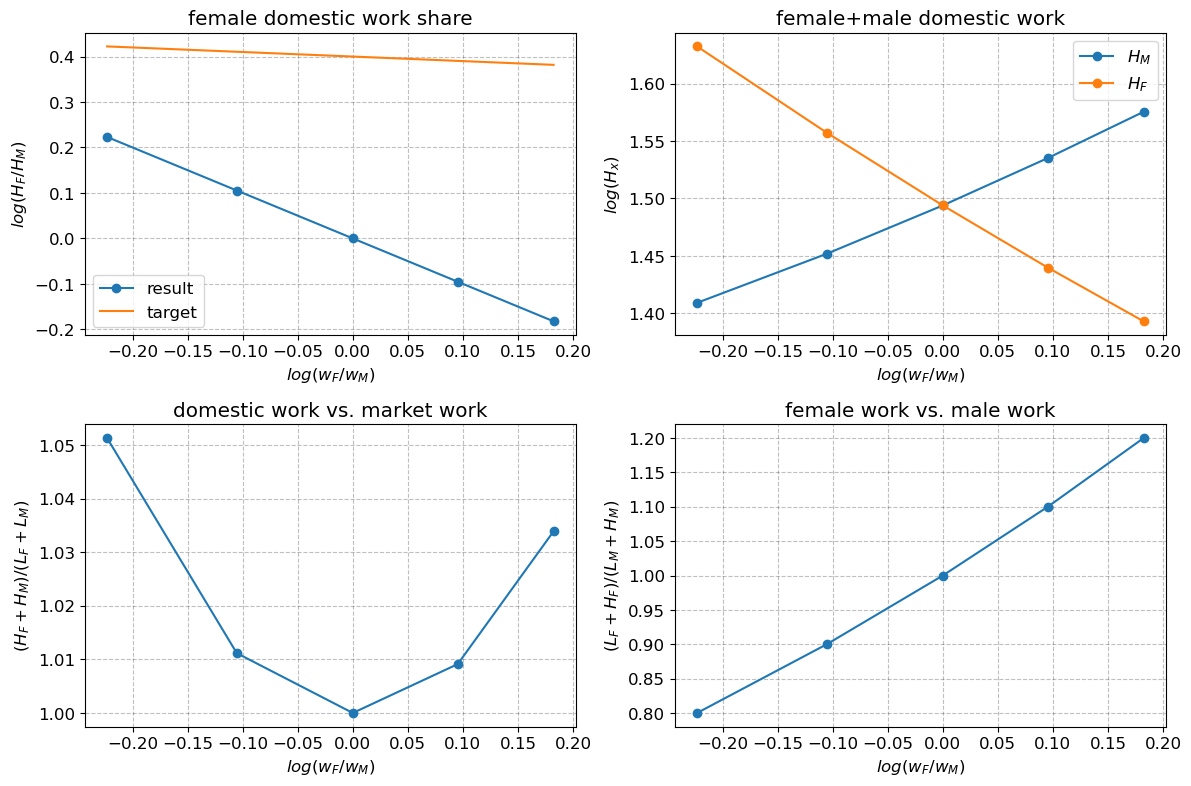

In [7]:
model.solve_wF_vec()
plot(model)

## 5. <a id='toc5_'></a>[Estimate](#toc0_)

In [8]:
model.estimate(alpha=0.982,sigma=0.10)

par.alpha =   0.98200000, par.sigma =   0.10000000: error =   0.00000001
par.alpha =   0.99900000, par.sigma =   0.10000000: error =   0.08449266
par.alpha =   0.98200000, par.sigma =   0.10500000: error =   0.00042174
par.alpha =   0.96500000, par.sigma =   0.10500000: error =   0.00270136
par.alpha =   0.97350000, par.sigma =   0.10375000: error =   0.00069567
par.alpha =   0.99050000, par.sigma =   0.10125000: error =   0.00497186
par.alpha =   0.97775000, par.sigma =   0.10312500: error =   0.00010749
par.alpha =   0.97775000, par.sigma =   0.09812500: error =   0.00083313
par.alpha =   0.98093750, par.sigma =   0.10328125: error =   0.00005989
par.alpha =   0.98518750, par.sigma =   0.10015625: error =   0.00041578
par.alpha =   0.97960937, par.sigma =   0.10238281: error =   0.00001841
par.alpha =   0.98067187, par.sigma =   0.09910156: error =   0.00011884
par.alpha =   0.98087109, par.sigma =   0.10223633: error =   0.00001133
par.alpha =   0.98326172, par.sigma =   0.09985352:

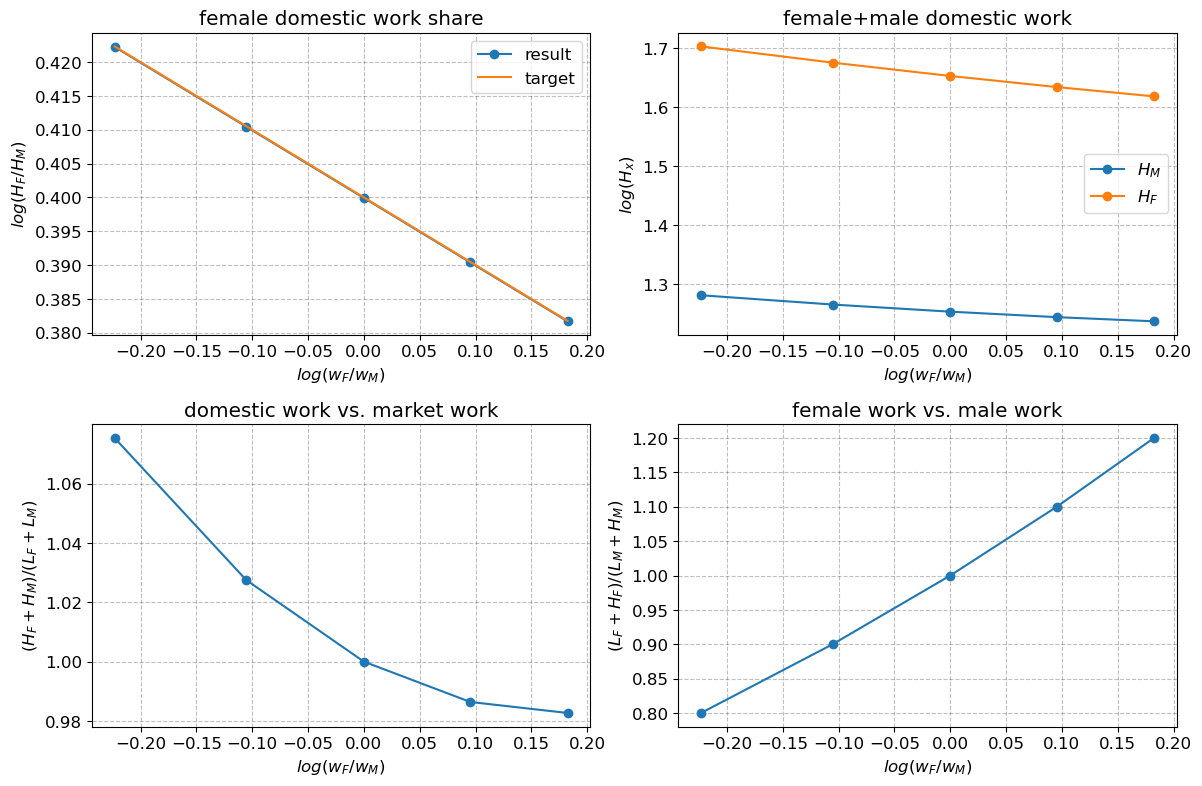

In [9]:
plot(model)

In [10]:
ratio = model.par.alpha/(1-model.par.alpha)
print(f'ratio of female to male productivity in home production {ratio:.2f}')

ratio of female to male productivity in home production 54.56
